In [65]:
from __future__ import division
from __future__ import print_function

from PIL import Image
import random
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [66]:
def binarize_array(numpy_array, threshold=75):
    """Binarize a numpy array."""
    for i in range(len(numpy_array)):
        for j in range(len(numpy_array[0])):
            if numpy_array[i][j] > threshold:
                numpy_array[i][j] = 255
            else:
                numpy_array[i][j] = 0
    return numpy_array

def binarize_image(img_path, threshold = 75):
    """Binarize an image."""
    image_file = Image.open(img_path)
    image = image_file.convert('L')  # convert image to monochrome
    image = np.array(image)
    image = binarize_array(image, threshold)
    return(image)
    #make sure to change this to something that is inputable in the NN

In [67]:
def preprocess(img, imgSize, dataAugmentation=False):
    "put img into target img of size imgSize, transpose for TF and normalize gray-values"

    # there are damaged files in IAM dataset - just use black image instead
    if img is None:
        img = np.zeros([imgSize[1], imgSize[0]])

    # increase dataset size by applying random stretches to the images
    if dataAugmentation:
        stretch = (random.random() - 0.5) # -0.5 .. +0.5
        wStretched = max(int(img.shape[1] * (1 + stretch)), 1) # random width, but at least 1
        img = cv2.resize(img, (wStretched, img.shape[0])) # stretch horizontally by factor 0.5 .. 1.5

    # create target image and copy sample image into it
    (wt, ht) = imgSize
    (h, w) = img.shape
    fx = w / wt
    fy = h / ht
    f = max(fx, fy)
    newSize = (max(min(wt, int(w / f)), 1), max(min(ht, int(h / f)), 1)) # scale according to f (result at least 1 and at most wt or ht)
    img = cv2.resize(img, newSize)
    target = np.ones([ht, wt]) * 255
    target[0:newSize[1], 0:newSize[0]] = img

    # normalize
    (m, s) = cv2.meanStdDev(img)
    m = m[0][0]
    s = s[0][0]
    img = img - m
    img = img / s if s>0 else img
    return img

In [68]:
sample_image = '/home/austin/Documents/Github/SimpleHTR/words_screenshot_labeled/8Hp7xmjAdT.png'

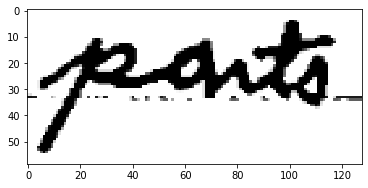

In [69]:
plt.imshow(preprocess(binarize_image(sample_image),[128,128]),interpolation='nearest')
plt.show()